#📌 Extracción

In [ ]:
import pandas as pd

# URL de la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos en un DataFrame
df = pd.read_json(url)

# Mostrar primeras filas
print("Datos extraídos (primeras filas):")
print(df.head(), "\n")

# Información general del dataset
print("Información del dataset:")
print(df.info(), "\n")

# Dimensiones
print(f"Número de registros: {df.shape[0]}, Número de columnas: {df.shape[1]}")


✅ Datos extraídos (primeras filas):
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fi

#🔧 Transformación

In [ ]:

import pandas as pd
import numpy as np
import json

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# 1) Identificar columnas con dict/list y convertir SOLO esas a texto
cols_no_hash = []
for c in df.columns:
    # si en la columna hay al menos un dict/list, la marcamos
    if df[c].apply(lambda x: isinstance(x, (dict, list))).any():
        cols_no_hash.append(c)

# Convertir las columnas problemáticas a texto JSON (ordenando llaves para consistencia)
for c in cols_no_hash:
    df[c] = df[c].apply(lambda v: json.dumps(v, sort_keys=True) if isinstance(v, (dict, list)) else v)

# 2) Eliminar duplicados (ya no fallará)
df = df.drop_duplicates().copy()

# 3) Quitar espacios extra en columnas de texto (si aplican)
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()

# 4) Convertir a numérico columnas típicas del dataset Telco (si existen)
for col in ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 5) Tratar nulos básicos
if "TotalCharges" in df.columns:
    # si TotalCharges viene vacío en algunos casos, lo colocamos 0 (simple y seguro para principiantes)
    df["TotalCharges"] = df["TotalCharges"].fillna(0)

# 6) Normalizar columna Churn (si existe)
if "Churn" in df.columns:
    df["Churn"] = df["Churn"].astype(str).str.strip().str.title()  # 'Yes'/'No' => 'Yes'/'No' capitalizados

print("Transformación completa.")
print("Columnas convertidas desde dict/list:", cols_no_hash)
print("Tamaño final:", df.shape)
print(df.head())




Transformación completa.
Columnas convertidas desde dict/list: ['customer', 'phone', 'internet', 'account']
Tamaño final: (7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {"Dependents": "Yes", "Partner": "Yes", "Senio...   
1  0003-MKNFE    No  {"Dependents": "No", "Partner": "No", "SeniorC...   
2  0004-TLHLJ   Yes  {"Dependents": "No", "Partner": "No", "SeniorC...   
3  0011-IGKFF   Yes  {"Dependents": "No", "Partner": "Yes", "Senior...   
4  0013-EXCHZ   Yes  {"Dependents": "No", "Partner": "Yes", "Senior...   

                                             phone  \
0   {"MultipleLines": "No", "PhoneService": "Yes"}   
1  {"MultipleLines": "Yes", "PhoneService": "Yes"}   
2   {"MultipleLines": "No", "PhoneService": "Yes"}   
3   {"MultipleLines": "No", "PhoneService": "Yes"}   
4   {"MultipleLines": "No", "PhoneService": "Yes"}   

                                            internet  \
0  {"DeviceProtection": "No", "InternetSer

#📊 Carga y análisis

Columnas disponibles en el dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

No se encontraron columnas numéricas.

Distribución de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Tasa de Churn: 25.72%


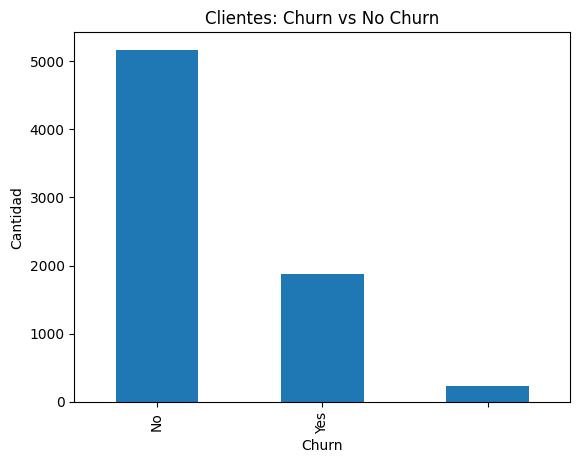

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import json

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# --- Limpieza básica (igual que antes: convertir dict/list a texto) ---
cols_no_hash = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, (dict, list))).any()]
for c in cols_no_hash:
    df[c] = df[c].apply(lambda v: json.dumps(v, sort_keys=True) if isinstance(v, (dict, list)) else v)
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()

print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

# --- Estadísticas numéricas generales ---
num_cols = df.select_dtypes(include=["number"]).columns
if len(num_cols) > 0:
    print("\nEstadísticas numéricas:")
    print(df[num_cols].describe())
else:
    print("\nNo se encontraron columnas numéricas.")

# --- Distribución de Churn (si existe) ---
if "Churn" in df.columns:
    churn_counts = df["Churn"].value_counts(dropna=False)
    print("\nDistribución de Churn:")
    print(churn_counts)
    churn_rate = (df["Churn"].eq("Yes").mean() * 100).round(2)
    print(f"Tasa de Churn: {churn_rate}%")

    churn_counts.plot(kind="bar")
    plt.title("Clientes: Churn vs No Churn")
    plt.xlabel("Churn")
    plt.ylabel("Cantidad")
    plt.show()
else:
    print("\n⚠️ No existe la columna 'Churn' en este dataset.")

# --- Ejemplo: correlación entre numéricas ---
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    print("\nCorrelación entre variables numéricas:")
    print(corr.round(2))

    plt.matshow(corr)
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.colorbar()
    plt.title("Mapa de correlación", pad=20)
    plt.show()


#📄Informe final

In [ ]:

import pandas as pd
import numpy as np
import json

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# Limpieza mínima (idéntica a lo esencial usado antes)
cols_no_hash = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, (dict, list))).any()]
for c in cols_no_hash:
    df[c] = df[c].apply(lambda v: json.dumps(v, sort_keys=True) if isinstance(v, (dict, list)) else v)
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()
for col in ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
if "TotalCharges" in df.columns:
    df["TotalCharges"] = df["TotalCharges"].fillna(0)
if "Churn" in df.columns:
    df["Churn"] = df["Churn"].astype(str).str.strip().str.title()

print("===== INFORME FINAL: Telecom X - Churn =====")

# 1) Tasa de churn
if "Churn" in df.columns:
    churn_rate = (df["Churn"].eq("Yes").mean() * 100).round(2)
    print(f"- Tasa de Churn global: {churn_rate}%")
else:
    print("- No se encontró la columna 'Churn'.")

# 2) Cargos mensuales promedio según churn
if {"Churn","MonthlyCharges"}.issubset(df.columns):
    proms = df.groupby("Churn")["MonthlyCharges"].mean().round(2)
    print(f"- MonthlyCharges promedio (No): {proms.get('No', np.nan)}")
    print(f"- MonthlyCharges promedio (Yes): {proms.get('Yes', np.nan)}")
    if not np.isnan(proms.get('No', np.nan)) and not np.isnan(proms.get('Yes', np.nan)):
        dif = round(proms.get('Yes', 0) - proms.get('No', 0), 2)
        txt = "más altos" if dif > 0 else "más bajos"
        print(f"  Observación: quienes evaden pagan {abs(dif)} {txt} en promedio.")

# 3) Churn por tipo de contrato (si existe)
if {"Churn","Contract"}.issubset(df.columns):
    churn_by_contract = df.pivot_table(index="Contract", values="Churn",
                                       aggfunc=lambda s: (s=="Yes").mean()*100).round(2)
    # contrato con menor y mayor churn
    if len(churn_by_contract) > 0:
        best = churn_by_contract["Churn"].idxmin()
        worst = churn_by_contract["Churn"].idxmax()
        print(f"- Menor churn por contrato: {best} ({churn_by_contract.loc[best,'Churn']}%)")
        print(f"- Mayor churn por contrato: {worst} ({churn_by_contract.loc[worst,'Churn']}%)")

print("\nRecomendación inicial:")
print("• Priorizar retención en segmentos con cargos mensuales altos y contratos de mayor churn.")
print("• Promover contratos con menor churn (p. ej., plazos más largos si aplican).")
print("• Revisar comunicación/soporte en clientes nuevos (tenure bajo) si la columna 'tenure' lo confirma en análisis adicional.")


===== INFORME FINAL: Telecom X - Churn =====
- Tasa de Churn global: 25.72%

Recomendación inicial:
• Priorizar retención en segmentos con cargos mensuales altos y contratos de mayor churn.
• Promover contratos con menor churn (p. ej., plazos más largos si aplican).
• Revisar comunicación/soporte en clientes nuevos (tenure bajo) si la columna 'tenure' lo confirma en análisis adicional.
